In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Cargar el dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/IMDB Dataset.csv")
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
# 2. División del dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# 3. Crear la representación de Bolsa de Palabras
vectorizer = CountVectorizer(stop_words='english', max_features=5000)  # max_features para limitar el vocabulario
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
# 4. Entrenar el modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train_bow, y_train)

MultinomialNB()

In [ ]:
# 5. Predecir y evaluar
y_pred = model.predict(X_test_bow)

In [ ]:
# 6. Evaluación del rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8448
Confusion Matrix:
 [[4218  743]
 [ 809 4230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      4961
           1       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



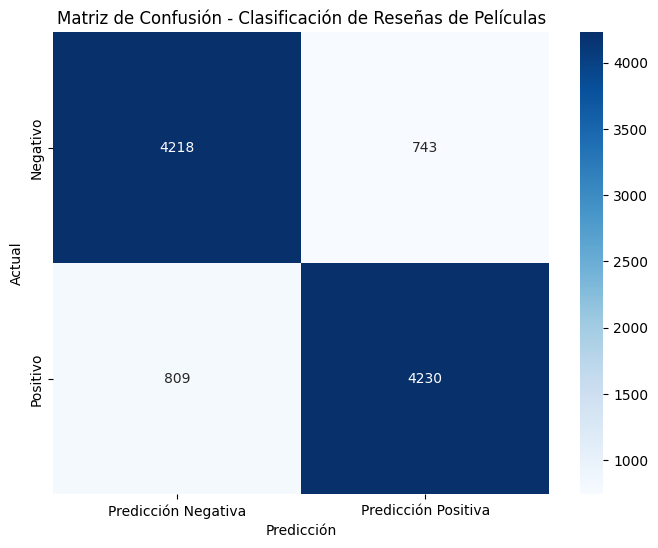

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión como DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Negativo', 'Positivo'], columns=['Predicción Negativa', 'Predicción Positiva'])

# Visualización de la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión - Clasificación de Reseñas de Películas')
plt.show()
